In [1]:
# Libraries
import re
import datetime
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

## Table of Contents
- [Section 1 - Exploratory Data Analysis of homeless dataset](#section-1---exploratory-data-analysis-of-homeless-dataset)
  - [Loading the CSV file into a dataframe](#loading-the-csv-file-into-a-dataframe)
  - [General overview of the dataset](#general-overview-of-the-dataset)
  - [Do I have any missing data?](#do-i-have-any-missing-data)
  - [Taking a look at the categorical variables](#taking-a-look-at-the-categorical-variables)
  - [Taking a look at the numerical variables](#taking-a-look-at-the-numerical-variables)
  - [Looking for correlations](#looking-for-correlations)

<a id="section-1-exploratory-data-analysis-of-homeless-dataset"></a>
## Section 1 - Exploratory Data Analysis of homeless dataset

<a id="loading-the-csv-file-into-a-dataframe"></a>
### Loading the CSV file into a dataframe

In [2]:
current_date = datetime.datetime.now().strftime("%m_%d_%Y")

# Loading the homeless dataset into a DataFrame
file_path = f"./data/homeless_dataset_full.csv"
df_homeless_csv = pd.read_csv(file_path, encoding="utf-8")

# Displaying 10 random rows of the all tech is human data
df_homeless_csv.sample(10, random_state=45)

,CoC Number,County,Year,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Hispanic/Latino,Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,CoC Number Original,CoC Name,CoC Category,State,Median_House_Values_1_year,Percentage_of_Households_with_Cost_Burden_1_year,Median_Rent_1_year,Median_Gross_Rent_1_year,Share_of_Renter_Occupied_Units_1_year,Rental_Vacancy_Rates_1_year,Total_Housing_Units_1_year,Share_of_Overcrowded_Housing_Units_1_year,Share_of_Single_Person_Households_1_year,Median_Rental_Utility_Cost_1_year,Median_House_Values_5_year,Percentage_of_Households_with_Cost_Burden_5_year,Median_Rent_5_year,Median_Gross_Rent_5_year,Share_of_Renter_Occupied_Units_5_year,Rental_Vacancy_Rates_5_year,Total_Housing_Units_5_year,Share_of_Overcrowded_Housing_Units_5_year,Share_of_Single_Person_Households_5_year,Median_Rental_Utility_Cost_5_year,Geography,FIPS code,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,LAUS Code,State FIPS,County FIPS,Labor Force,Employed,Unemployed,Unemployment Rate,Total Population,Share of Single-Adult Households,Estimate Total White alone,Estimate Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Estimate Total Asian alone,Estimate Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Estimate Total Two or more races,Estimate Total Some Other Race alone,Estimate Total Two or More Races,Estimate Total 10 to 14 years,Estimate Total 15 to 17 years,Estimate Total 18 and 19 years,Estimate Total 20 years,Estimate Total 21 years,Estimate Total 22 to 24 years,Estimate Total 25 to 29 years,Estimate Total 30 to 34 years,Estimate Total 35 to 39 years,Estimate Total 40 to 44 years,Estimate Total 45 to 49 years,Estimate Total 5 to 9 years,Estimate Total 50 to 54 years,Estimate Total 55 to 59 years,Estimate Total 60 and 61 years,Estimate Total 62 to 64 years,Estimate Total 65 and 66 years,Estimate Total 67 to 69 years,Estimate Total 70 to 74 years,Estimate Total 75 to 79 years,Estimate Total 80 to 84 years,Estimate Total 85 years and over,Estimate Total Under 5 years,Proportion of Females,Estimate Gini Index,Median Household Income,Gini Index,Poverty Rate,JanuaryPrecipitation,YearlyPrecipitation,SummerTemperature,JanuaryTemperature,Share of Families Receiving Cash Assistance,Percentage of Homes Built before 1940,HUD_Assisted_Total_Units,Total Housing Units,Share of HUD-Assisted Units,HUD_Subsidized_Total_Units,pct_occupied,number_reported,pct_reported,Disabled workers,Total,Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over,With a Disability Estimate Population Age 16 and Over,Aged,Blind and disabled,SSI Participation Rate (Percent),SSDI Participation Rate (Percent),total_homeless_per_10k,total_sheltered_homeless_per_10k,unsheltered_homeless_per_10k
846,OK-501,tulsa county,2013,1008,886,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,['OK-501'],['Tulsa City & County CoC'],Major City CoC,oklahoma,136100.0,0.422550,608.0,836.0,0.41,81.0,274279.0,0.006336,0.0,228.0,134100,0.441534,599,857.0,0.39,8.9,270608,0.005254,0.0,258.0,0500000US40143,40143.0,1.04,354.67,176.12,123.44,CN4014300000000,40.0,143.0,310617.0,295245.0,15372.0,4.9,622409.0,0.119662,0.71,0.10,0.04,0.03,0.00,0.03,0.09,NaN,NaN,0.071051,0.039853,0.024447,0.014029,0.012577,0.043581,0.073066,0.072380,0.064748,0.064051,0.061882,0.069980,0.067183,0.065136,0.023231,0.031683,0.021492,0.022265,0.027382,0.022564,0.016083,0.017472,0.073863,0.51

<a id="general-overview-of-the-dataset"></a>
### General overview of the dataset

Dataset Overview

The dataset consists of 1,159 entries and 121 columns (predictor variables). Most columns contain numeric data, while 8 columns are of type "object" (categorical or text-based).

Key Summary Statistics:
1. The dataset includes 123 unique CoCs (Continuums of Care).
2. There are 122 unique counties represented.
3. The most frequent CoC is MD-505, located in Baltimore, Maryland.
4. "Largely Suburban" CoCs are the most represented category.


In [3]:
# Looking at structure and basic infor
df_homeless_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Columns: 121 entries, CoC Number to unsheltered_homeless_per_10k
dtypes: float64(91), int64(22), object(8)
memory usage: 1.1+ MB


In [4]:
# Looking at column names
print("Column Names:\n", df_homeless_csv.columns)
#print("\nNumber of Unique Values per Column:\n", df_homeless_csv.nunique())

Column Names:
 Index(['CoC Number', 'County', 'Year', 'Overall Homeless',
       'Sheltered Total Homeless', 'Unsheltered Homeless',
       'Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       ...
       'Total',
       'Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over',
       'With a Disability Estimate Population Age 16 and Over', 'Aged',
       'Blind and disabled', 'SSI Participation Rate (Percent)',
       'SSDI Participation Rate (Percent)', 'total_homeless_per_10k',
       'total_sheltered_homeless_per_10k', 'unsheltered_homeless_per_10k'],
      dtype='object', length=121)


In [5]:
# Displaying unique value counts for all columns
display(df_homeless_csv.nunique().to_frame().T)

,CoC Number,County,Year,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Hispanic/Latino,Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,CoC Number Original,CoC Name,CoC Category,State,Median_House_Values_1_year,Percentage_of_Households_with_Cost_Burden_1_year,Median_Rent_1_year,Median_Gross_Rent_1_year,Share_of_Renter_Occupied_Units_1_year,Rental_Vacancy_Rates_1_year,Total_Housing_Units_1_year,Share_of_Overcrowded_Housing_Units_1_year,Share_of_Single_Person_Households_1_year,Median_Rental_Utility_Cost_1_year,Median_House_Values_5_year,Percentage_of_Households_with_Cost_Burden_5_year,Median_Rent_5_year,Median_Gross_Rent_5_year,Share_of_Renter_Occupied_Units_5_year,Rental_Vacancy_Rates_5_year,Total_Housing_Units_5_year,Share_of_Overcrowded_Housing_Units_5_year,Share_of_Single_Person_Households_5_year,Median_Rental_Utility_Cost_5_year,Geography,FIPS code,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,LAUS Code,State FIPS,County FIPS,Labor Force,Employed,Unemployed,Unemployment Rate,Total Population,Share of Single-Adult Households,Estimate Total White alone,Estimate Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Estimate Total Asian alone,Estimate Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Estimate Total Two or more races,Estimate Total Some Other Race alone,Estimate Total Two or More Races,Estimate Total 10 to 14 years,Estimate Total 15 to 17 years,Estimate Total 18 and 19 years,Estimate Total 20 years,Estimate Total 21 years,Estimate Total 22 to 24 years,Estimate Total 25 to 29 years,Estimate Total 30 to 34 years,Estimate Total 35 to 39 years,Estimate Total 40 to 44 years,Estimate Total 45 to 49 years,Estimate Total 5 to 9 years,Estimate Total 50 to 54 years,Estimate Total 55 to 59 years,Estimate Total 60 and 61 years,Estimate Total 62 to 64 years,Estimate Total 65 and 66 years,Estimate Total 67 to 69 years,Estimate Total 70 to 74 years,Estimate Total 75 to 79 years,Estimate Total 80 to 84 years,Estimate Total 85 years and over,Estimate Total Under 5 years,Proportion of Females,Estimate Gini Index,Median Household Income,Gini Index,Poverty Rate,JanuaryPrecipitation,YearlyPrecipitation,SummerTemperature,JanuaryTemperature,Share of Families Receiving Cash Assistance,Percentage of Homes Built before 1940,HUD_Assisted_Total_Units,Total Housing Units,Share of HUD-Assisted Units,HUD_Subsidized_Total_Units,pct_occupied,number_reported,pct_reported,Disabled workers,Total,Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over,With a Disability Estimate Population Age 16 and Over,Aged,Blind and disabled,SSI Participation Rate (Percent),SSDI Participation Rate (Percent),total_homeless_per_10k,total_sheltered_homeless_per_10k,unsheltered_homeless_per_10k
0,123,122,9,890,819,503,353,262,512,375,401,279,403,1,1,1,77,167,372,81,130,124,124,4,25,984,1127,671,739,52,142,1127,1114,27,453,966,1130,655,668,49,233,1126,1130,25,451,127,125,881,1109,1064,1066,127,25,69,882,883,866,101,1128,1129,59,49,6,38,3,26,12,0,0,1129,1129,1129,1129,1128,1128,1129,1129,1129,1129,1129,1129,1129,1128,1129,1129,1129,1129,1129,1129,1129,1129,1128,7,682,1114,717,218,540,1005,266,424,1089,1129,701,716,719,736,32,736,16,427,442,429,428,426,433,437,442,1130,1130,1129


In [6]:
# Looking at basic summary statistics
df_homeless_csv.describe(include="all")

,CoC Number,County,Year,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Hispanic/Latino,Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,CoC Number Original,CoC Name,CoC Category,State,Median_House_Values_1_year,Percentage_of_Households_with_Cost_Burden_1_year,Median_Rent_1_year,Median_Gross_Rent_1_year,Share_of_Renter_Occupied_Units_1_year,Rental_Vacancy_Rates_1_year,Total_Housing_Units_1_year,Share_of_Overcrowded_Housing_Units_1_year,Share_of_Single_Person_Households_1_year,Median_Rental_Utility_Cost_1_year,Median_House_Values_5_year,Percentage_of_Households_with_Cost_Burden_5_year,Median_Rent_5_year,Median_Gross_Rent_5_year,Share_of_Renter_Occupied_Units_5_year,Rental_Vacancy_Rates_5_year,Total_Housing_Units_5_year,Share_of_Overcrowded_Housing_Units_5_year,Share_of_Single_Person_Households_5_year,Median_Rental_Utility_Cost_5_year,Geography,FIPS code,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,LAUS Code,State FIPS,County FIPS,Labor Force,Employed,Unemployed,Unemployment Rate,Total Population,Share of Single-Adult Households,Estimate Total White alone,Estimate Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Estimate Total Asian alone,Estimate Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Estimate Total Two or more races,Estimate Total Some Other Race alone,Estimate Total Two or More Races,Estimate Total 10 to 14 years,Estimate Total 15 to 17 years,Estimate Total 18 and 19 years,Estimate Total 20 years,Estimate Total 21 years,Estimate Total 22 to 24 years,Estimate Total 25 to 29 years,Estimate Total 30 to 34 years,Estimate Total 35 to 39 years,Estimate Total 40 to 44 years,Estimate Total 45 to 49 years,Estimate Total 5 to 9 years,Estimate Total 50 to 54 years,Estimate Total 55 to 59 years,Estimate Total 60 and 61 years,Estimate Total 62 to 64 years,Estimate Total 65 and 66 years,Estimate Total 67 to 69 years,Estimate Total 70 to 74 years,Estimate Total 75 to 79 years,Estimate Total 80 to 84 years,Estimate Total 85 years and over,Estimate Total Under 5 years,Proportion of Females,Estimate Gini Index,Median Household Income,Gini Index,Poverty Rate,JanuaryPrecipitation,YearlyPrecipitation,SummerTemperature,JanuaryTemperature,Share of Families Receiving Cash Assistance,Percentage of Homes Built before 1940,HUD_Assisted_Total_Units,Total Housing Units,Share of HUD-Assisted Units,HUD_Subsidized_Total_Units,pct_occupied,number_reported,pct_reported,Disabled workers,Total,Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over,With a Disability Estimate Population Age 16 and Over,Aged,Blind and disabled,SSI Participation Rate (Percent),SSDI Participation Rate (Percent),total_homeless_per_10k,total_sheltered_homeless_per_10k,unsheltered_homeless_per_10k
count,1159,1159,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.0,1159.0,1159.0,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159,1159,1159,1159,1.158000e+03,1156.000000,1158.000000,1158.000000,1158.000000,1158.000000,1.158000e+03,1144.000000,1158.000000,1158.000000,1159.000000,1159.000000,1159.000000,1036.000000,1159.000000,1159.000000,1.159000e+03,1159.000000,1159.000000,1036.000000,1159,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,912,912.000000,912.000000,9.120000e+02,9.120000e+02,912.000000,912.000000,1.158000e+0

In [7]:
# Checking the data type of columns
df_dtypes = df_homeless_csv.dtypes.to_frame().T
df_dtypes.index = ["Data Type"]  # Rename the index for clarity
display(df_dtypes)

,CoC Number,County,Year,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Hispanic/Latino,Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,CoC Number Original,CoC Name,CoC Category,State,Median_House_Values_1_year,Percentage_of_Households_with_Cost_Burden_1_year,Median_Rent_1_year,Median_Gross_Rent_1_year,Share_of_Renter_Occupied_Units_1_year,Rental_Vacancy_Rates_1_year,Total_Housing_Units_1_year,Share_of_Overcrowded_Housing_Units_1_year,Share_of_Single_Person_Households_1_year,Median_Rental_Utility_Cost_1_year,Median_House_Values_5_year,Percentage_of_Households_with_Cost_Burden_5_year,Median_Rent_5_year,Median_Gross_Rent_5_year,Share_of_Renter_Occupied_Units_5_year,Rental_Vacancy_Rates_5_year,Total_Housing_Units_5_year,Share_of_Overcrowded_Housing_Units_5_year,Share_of_Single_Person_Households_5_year,Median_Rental_Utility_Cost_5_year,Geography,FIPS code,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,LAUS Code,State FIPS,County FIPS,Labor Force,Employed,Unemployed,Unemployment Rate,Total Population,Share of Single-Adult Households,Estimate Total White alone,Estimate Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Estimate Total Asian alone,Estimate Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Estimate Total Two or more races,Estimate Total Some Other Race alone,Estimate Total Two or More Races,Estimate Total 10 to 14 years,Estimate Total 15 to 17 years,Estimate Total 18 and 19 years,Estimate Total 20 years,Estimate Total 21 years,Estimate Total 22 to 24 years,Estimate Total 25 to 29 years,Estimate Total 30 to 34 years,Estimate Total 35 to 39 years,Estimate Total 40 to 44 years,Estimate Total 45 to 49 years,Estimate Total 5 to 9 years,Estimate Total 50 to 54 years,Estimate Total 55 to 59 years,Estimate Total 60 and 61 years,Estimate Total 62 to 64 years,Estimate Total 65 and 66 years,Estimate Total 67 to 69 years,Estimate Total 70 to 74 years,Estimate Total 75 to 79 years,Estimate Total 80 to 84 years,Estimate Total 85 years and over,Estimate Total Under 5 years,Proportion of Females,Estimate Gini Index,Median Household Income,Gini Index,Poverty Rate,JanuaryPrecipitation,YearlyPrecipitation,SummerTemperature,JanuaryTemperature,Share of Families Receiving Cash Assistance,Percentage of Homes Built before 1940,HUD_Assisted_Total_Units,Total Housing Units,Share of HUD-Assisted Units,HUD_Subsidized_Total_Units,pct_occupied,number_reported,pct_reported,Disabled workers,Total,Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over,With a Disability Estimate Population Age 16 and Over,Aged,Blind and disabled,SSI Participation Rate (Percent),SSDI Participation Rate (Percent),total_homeless_per_10k,total_sheltered_homeless_per_10k,unsheltered_homeless_per_10k
Data Type,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,int64,float64,float64,float64,object,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,floa

<a id="do-i-have-any-missing-data"></a>
### Do I have any missing data?

There are several columns with missing values, and I am unsure of DSA's protocol for handling them. Should we drop, fill, or impute? Also, it looks like there are no values for the predictor variables 'Estimate Total Some Other Race Alone' and 'Estimate Total Two or More Races.' How should we approach these?

In [8]:
#df_homeless_csv.isnull().sum()
display(df_homeless_csv.isnull().sum().to_frame().T)

,CoC Number,County,Year,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Hispanic/Latino,Overall Homeless - White,"Overall Homeless - Black, African American, or African",Overall Homeless - Asian or Asian American,"Overall Homeless - American Indian, Alaska Native, or Indigenous",Overall Homeless - Native Hawaiian or Other Pacific Islander,Overall Homeless - Multiple Races,Overall Homeless - Black or African American,Overall Homeless - Asian,Overall Homeless - American Indian or Alaska Native,CoC Number Original,CoC Name,CoC Category,State,Median_House_Values_1_year,Percentage_of_Households_with_Cost_Burden_1_year,Median_Rent_1_year,Median_Gross_Rent_1_year,Share_of_Renter_Occupied_Units_1_year,Rental_Vacancy_Rates_1_year,Total_Housing_Units_1_year,Share_of_Overcrowded_Housing_Units_1_year,Share_of_Single_Person_Households_1_year,Median_Rental_Utility_Cost_1_year,Median_House_Values_5_year,Percentage_of_Households_with_Cost_Burden_5_year,Median_Rent_5_year,Median_Gross_Rent_5_year,Share_of_Renter_Occupied_Units_5_year,Rental_Vacancy_Rates_5_year,Total_Housing_Units_5_year,Share_of_Overcrowded_Housing_Units_5_year,Share_of_Single_Person_Households_5_year,Median_Rental_Utility_Cost_5_year,Geography,FIPS code,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,LAUS Code,State FIPS,County FIPS,Labor Force,Employed,Unemployed,Unemployment Rate,Total Population,Share of Single-Adult Households,Estimate Total White alone,Estimate Total Black or African American alone,Estimate Total American Indian and Alaska Native alone,Estimate Total Asian alone,Estimate Total Native Hawaiian and Other Pacific Islander alone,Estimate Total Some other race alone,Estimate Total Two or more races,Estimate Total Some Other Race alone,Estimate Total Two or More Races,Estimate Total 10 to 14 years,Estimate Total 15 to 17 years,Estimate Total 18 and 19 years,Estimate Total 20 years,Estimate Total 21 years,Estimate Total 22 to 24 years,Estimate Total 25 to 29 years,Estimate Total 30 to 34 years,Estimate Total 35 to 39 years,Estimate Total 40 to 44 years,Estimate Total 45 to 49 years,Estimate Total 5 to 9 years,Estimate Total 50 to 54 years,Estimate Total 55 to 59 years,Estimate Total 60 and 61 years,Estimate Total 62 to 64 years,Estimate Total 65 and 66 years,Estimate Total 67 to 69 years,Estimate Total 70 to 74 years,Estimate Total 75 to 79 years,Estimate Total 80 to 84 years,Estimate Total 85 years and over,Estimate Total Under 5 years,Proportion of Females,Estimate Gini Index,Median Household Income,Gini Index,Poverty Rate,JanuaryPrecipitation,YearlyPrecipitation,SummerTemperature,JanuaryTemperature,Share of Families Receiving Cash Assistance,Percentage of Homes Built before 1940,HUD_Assisted_Total_Units,Total Housing Units,Share of HUD-Assisted Units,HUD_Subsidized_Total_Units,pct_occupied,number_reported,pct_reported,Disabled workers,Total,Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over,With a Disability Estimate Population Age 16 and Over,Aged,Blind and disabled,SSI Participation Rate (Percent),SSDI Participation Rate (Percent),total_homeless_per_10k,total_sheltered_homeless_per_10k,unsheltered_homeless_per_10k
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,1,1,1,1,15,1,1,0,0,0,123,0,0,0,0,0,123,0,15,15,15,15,15,247,247,247,247,247,247,247,1,1,2,2,2,2,2,2,2,1159,1159,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,124,1,1,1,0,0,0,0,41,1,411,411,411,378,378,378,378,701,701,701,701,701,701,701,701,0,0,0


<a id="Taking-a-look-at-the-categorical-variables"></a>
### Taking a look at the categorical variables

Visualizing Categorical Distributions

To avoid overcrowded plots, I focused on the top 20 categories when visualizing categorical distributions. When plotting all rows, some graphs became too cluttered.

Key Observations:
1. The CoCs with the highest counts are MD-505 (Maryland), SC-503 (South Carolina), NJ-503 (New Jersey), and VA-601 (Virginia).
2. California appears most frequently in the dataset.
3. The "Largely Suburban" CoC category has the highest count.

In [9]:
# Checking the value counts for the categorical columns
categorical_cols = df_homeless_csv.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    #print(df_homeless_csv[col].value_counts(), "\n")
    display(df_homeless_csv[col].value_counts().to_frame())

,count
CoC Number,
MD-505,30
SC-503,21
NJ-503,18
VA-601,17
GA-500,12
...,...
GA-504,9
GA-503,9
FL-606,9


,count
County,
baltimore county,30
orange county,27
montgomery county,27
clark county,18
fairfax county,17
...,...
dane county,9
york county,8
fulton county,6


,count
CoC Number Original,
['MD-505'],30
['SC-503'],21
['NJ-503'],18
['VA-601'],17
['AL-501'],9
...,...
['GA-503'],9
['WI-503'],9
['PA-512'],8


,count
CoC Name,
['Baltimore County CoC'],30
"['Myrtle Beach, Sumter City & County CoC']",21
"['Camden City & County/Gloucester, Cape May, Cumberland Counties CoC']",18
['Fairfax County CoC'],17
['Mobile City & County/Baldwin County CoC'],9
...,...
['Athens-Clarke County CoC'],9
['Madison/Dane County CoC'],9
['York City & County CoC'],8


,count
CoC Category,
Largely Suburban CoC,796
Major City CoC,198
Other Largely Urban CoC,144
Largely Rural CoC,21


,count
State,
california,171
new jersey,126
florida,99
pennsylvania,98
illinois,72
maryland,57
ohio,54
michigan,54
north carolina,54


,count
Geography,
0500000US24005,30
0500000US51059,17
0500000US01097,9
0500000US36119,9
0500000US32031,9
...,...
0500000US55025,9
0500000US42133,8
0500000US13121,6


,count
LAUS Code,
CN2400500000000,28
CN5105900000000,15
CN0109700000000,7
CN3608700000000,7
CN3605500000000,7
...,...
CN1305900000000,7
CN5502500000000,7
CN1308900000000,6


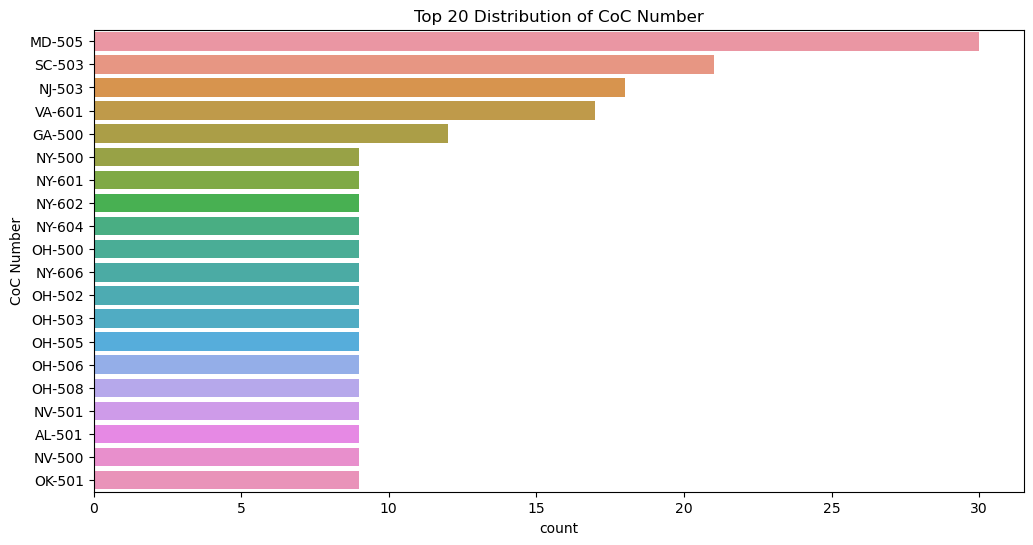

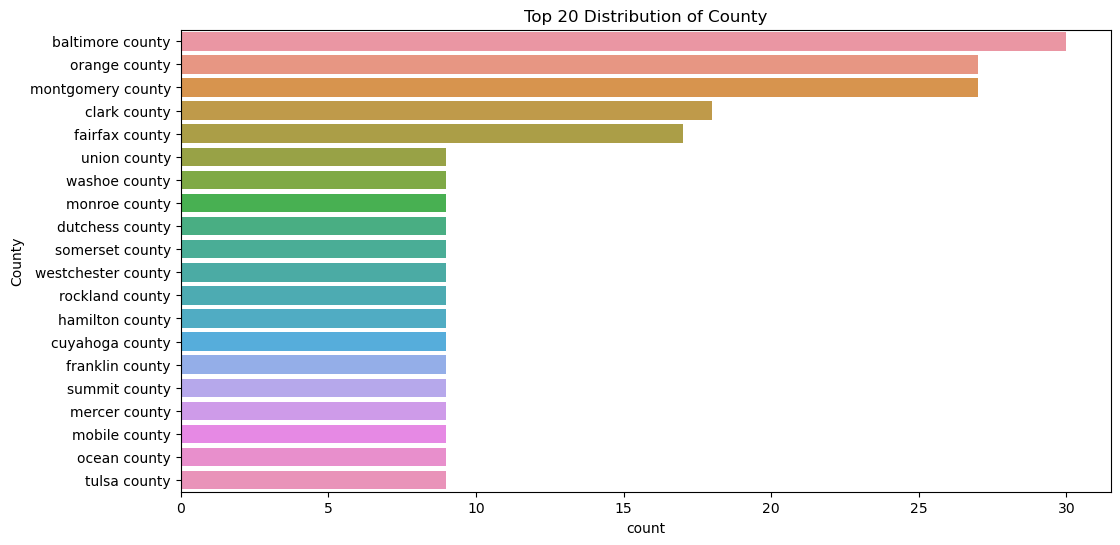

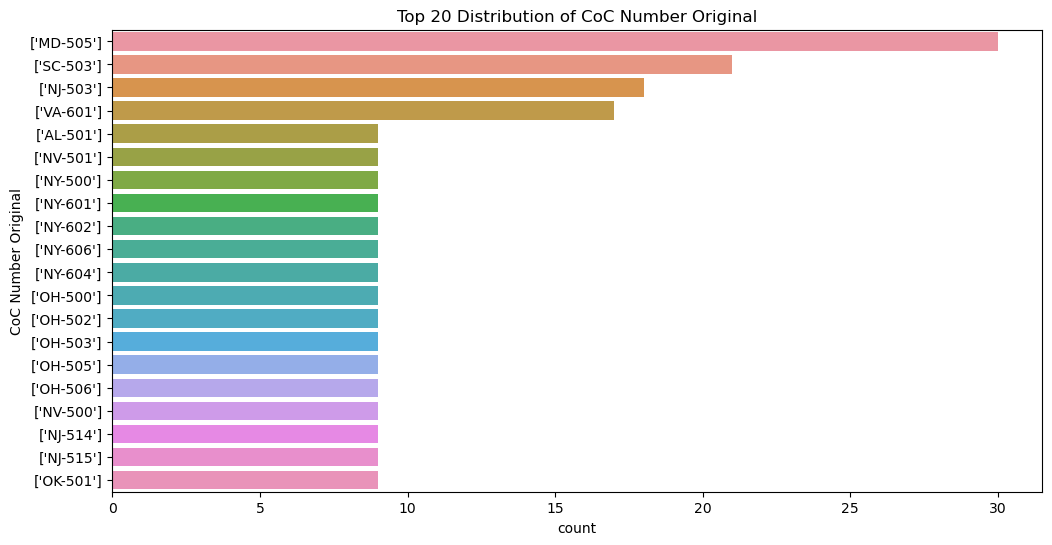

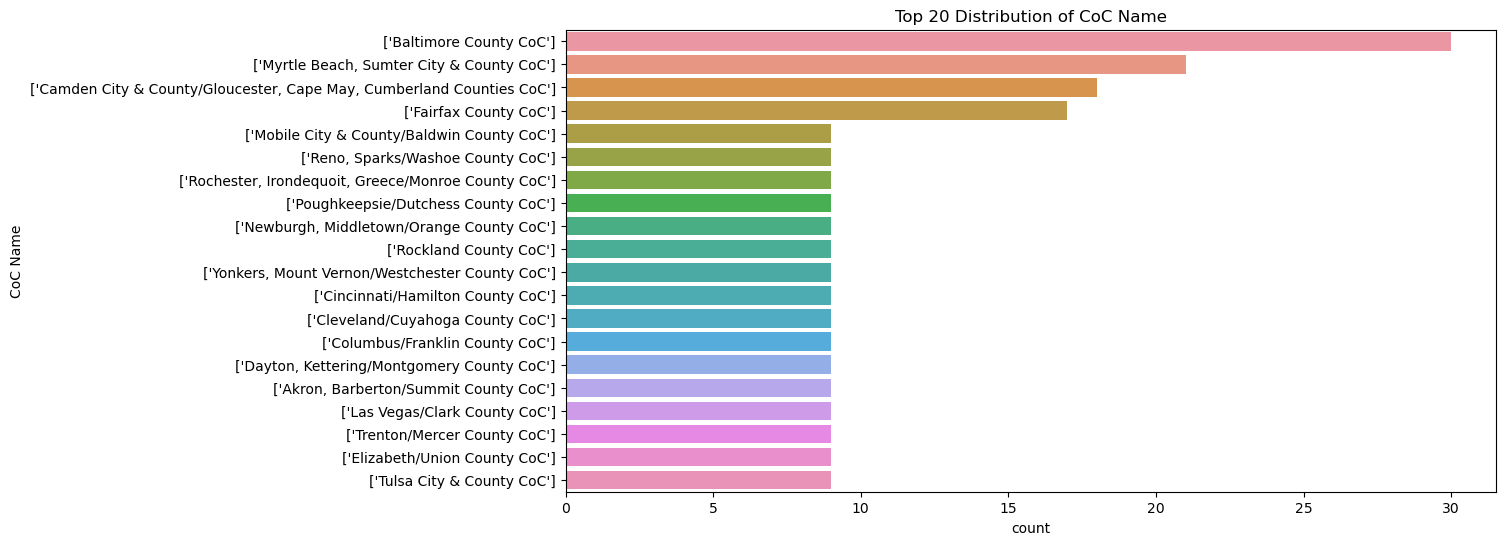

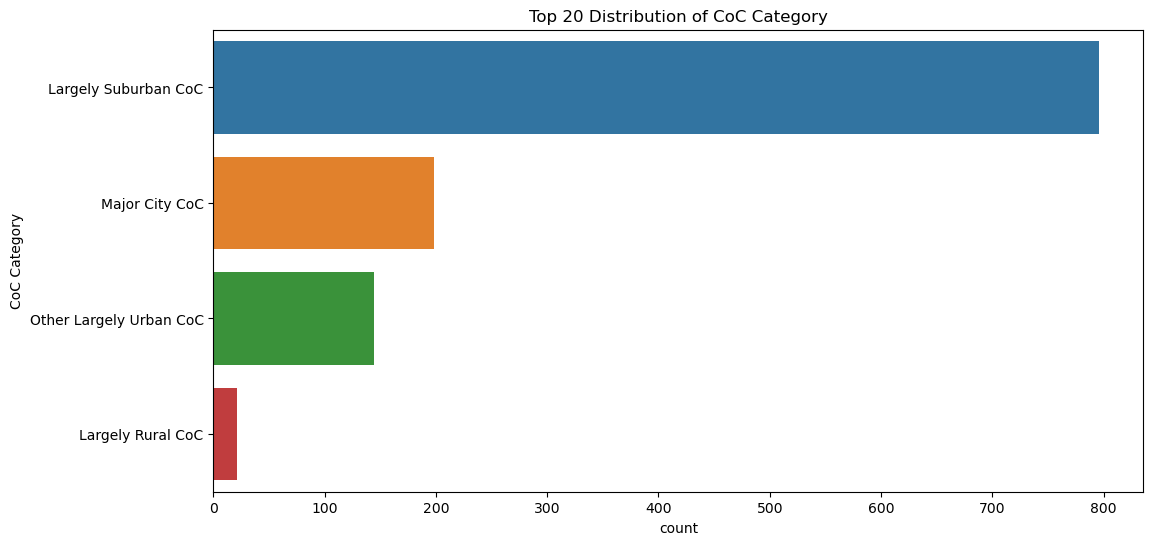

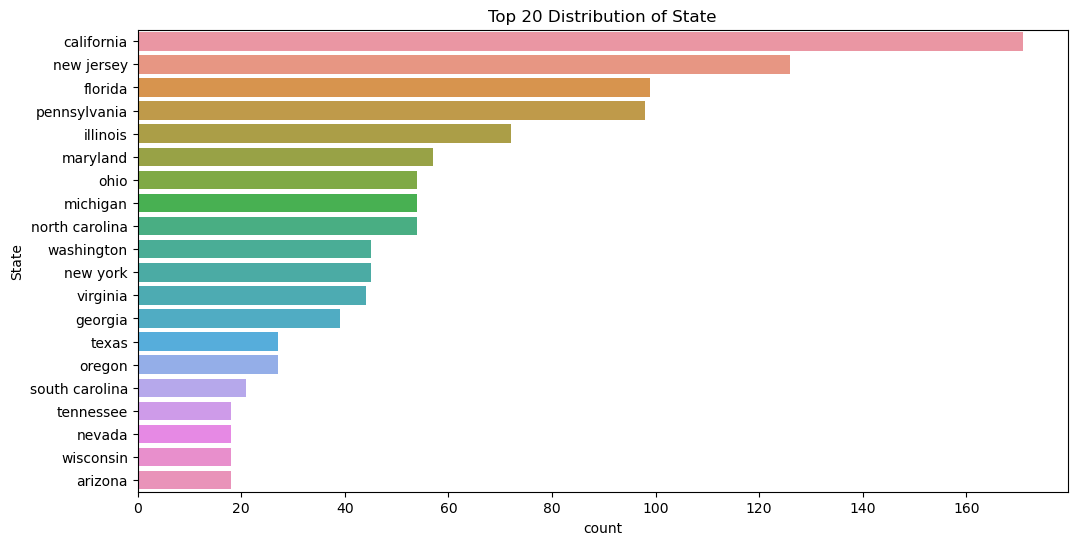

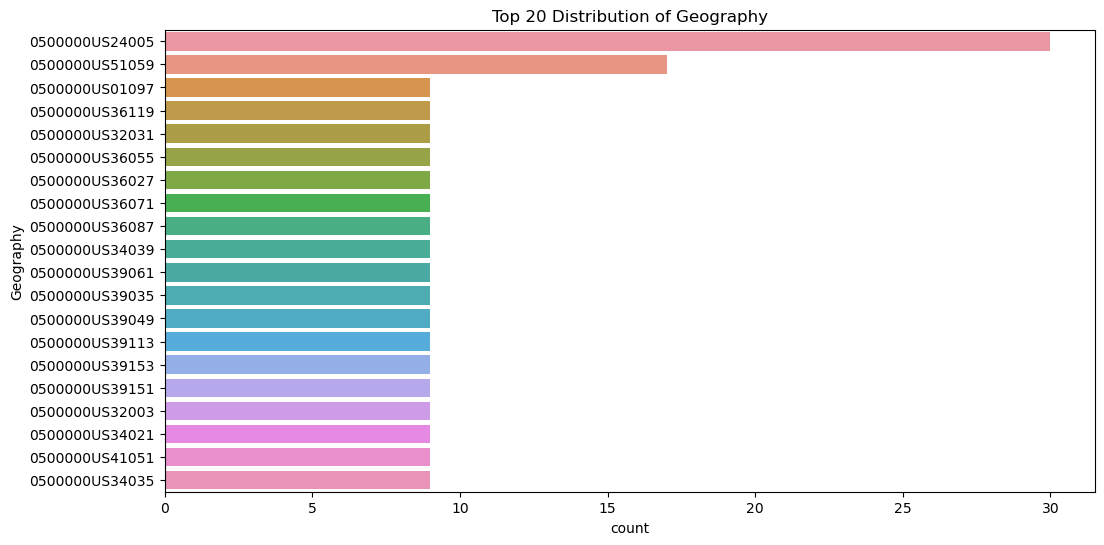

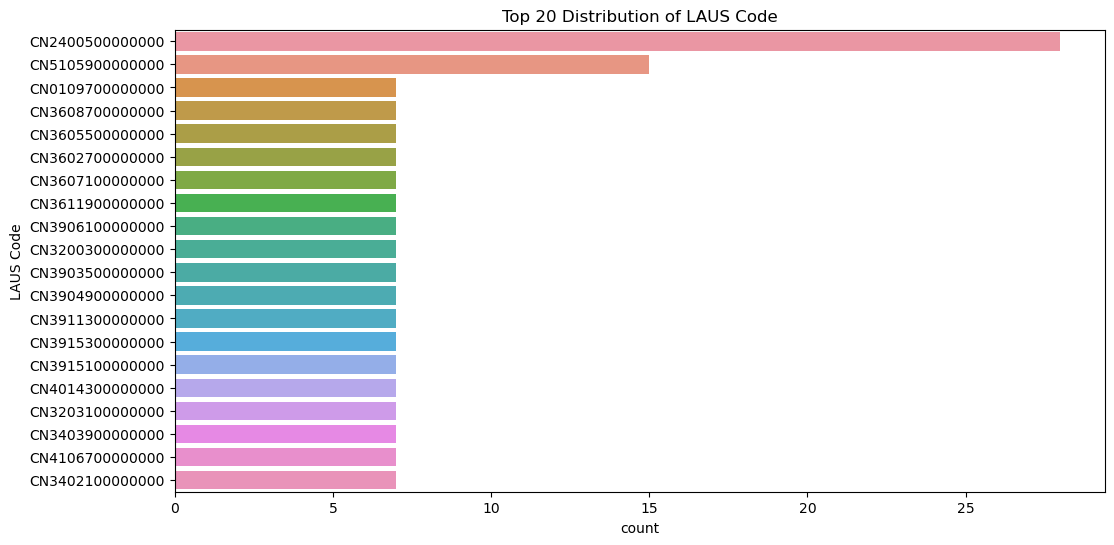

In [10]:
# Visualizing the categorical distribution
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    top_20 = df_homeless_csv[col].value_counts().nlargest(20).index  # Looking at the top 20
    sns.countplot(y=df_homeless_csv[col], order=top_20)
    plt.title(f"Top 20 Distribution of {col}")
    plt.show()

<a id="taking-a-look-at-the-numerical-variables"></a>
### Taking a look at the numerical variables

Visualizing Histograms

To enhance visibility, the histograms were plotted in batches. Here are some key observations from a quick scan:

1. The data spans the years 2010 to 2018.
2. Many histograms exhibit right-skewed distributions.
3. The histograms for total homeless, total sheltered homeless, and unsheltered homeless per 10k also show right-skewed distributions. This suggests:
    - Most CoCs have a relatively low number of homeless individuals.
    - A small number of CoCs have significantly higher homeless counts, creating the skewed pattern.

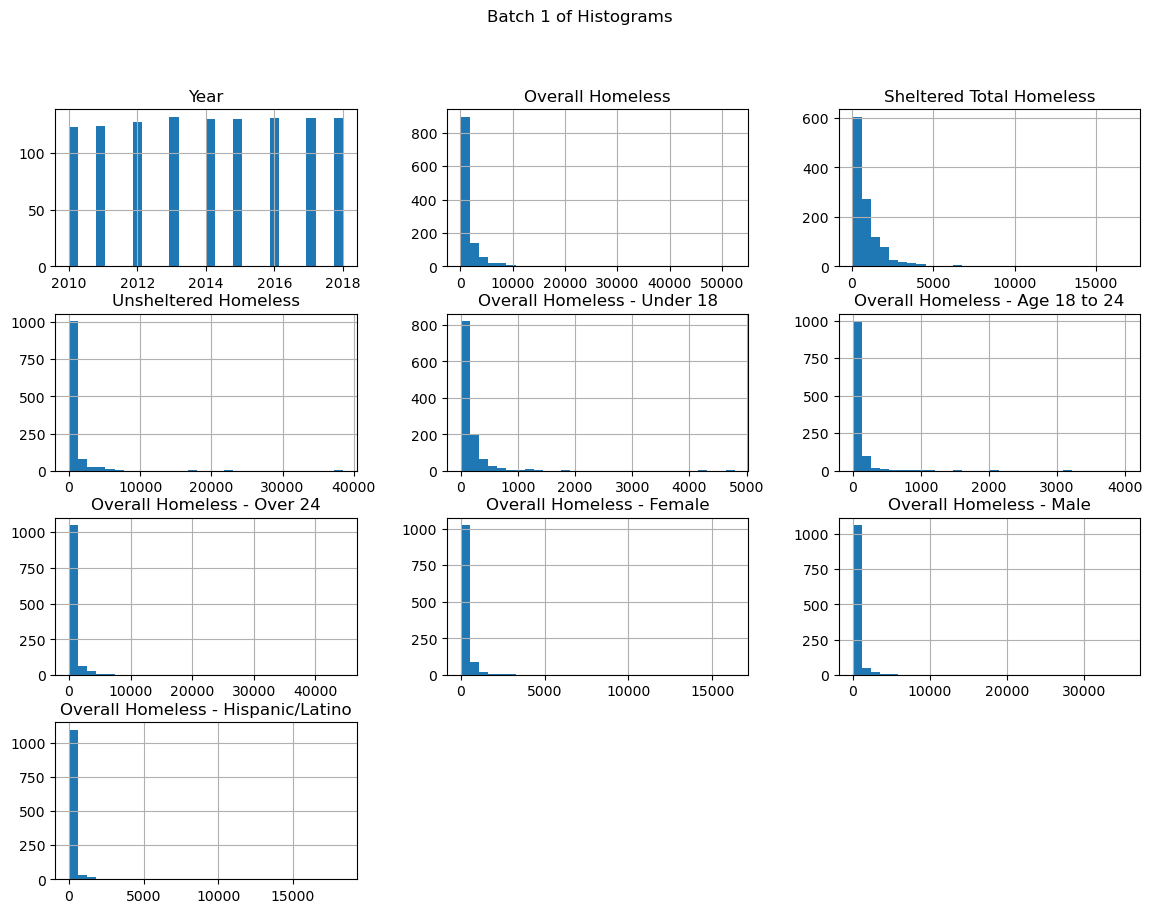

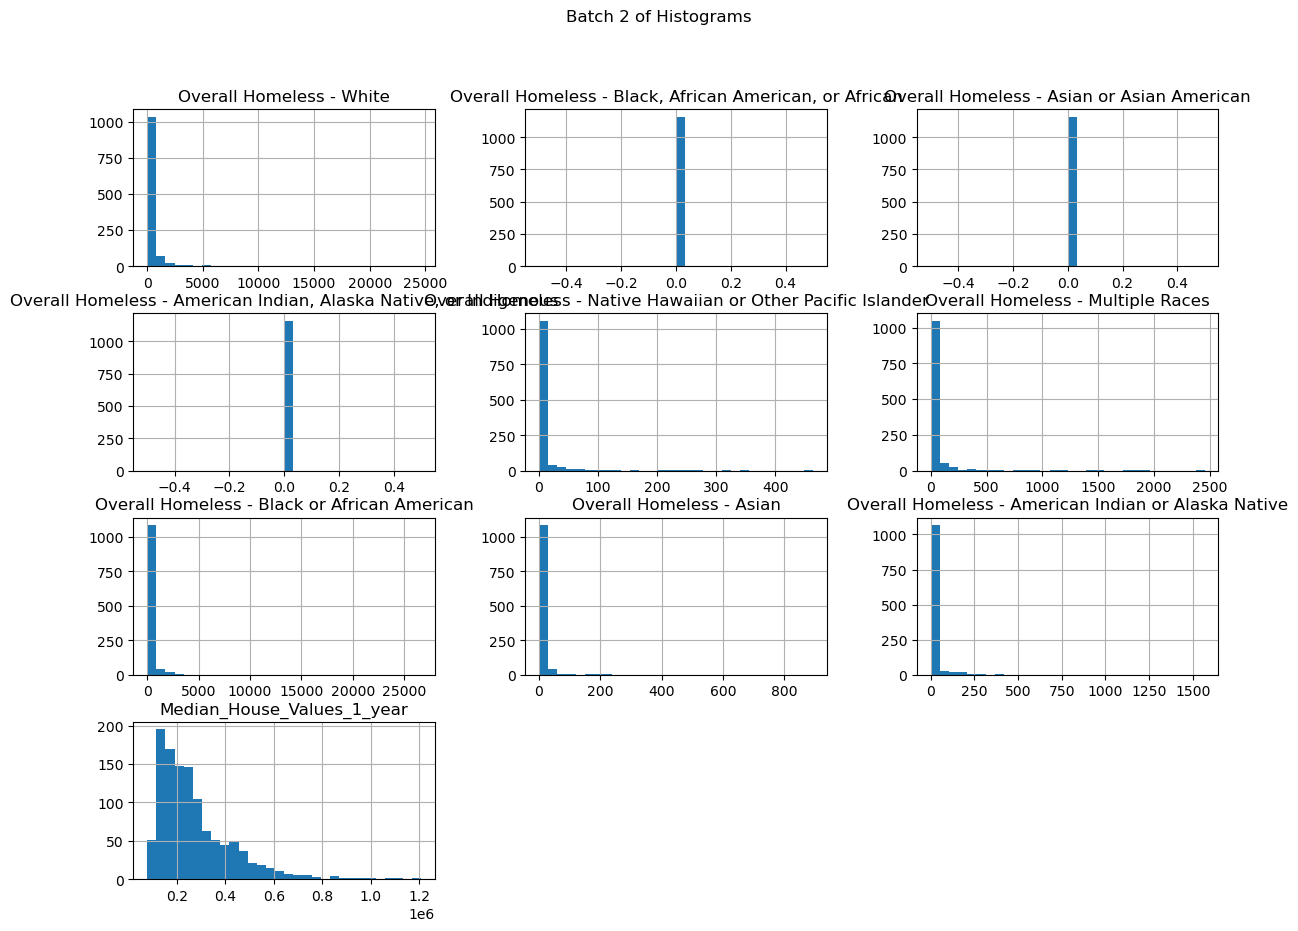

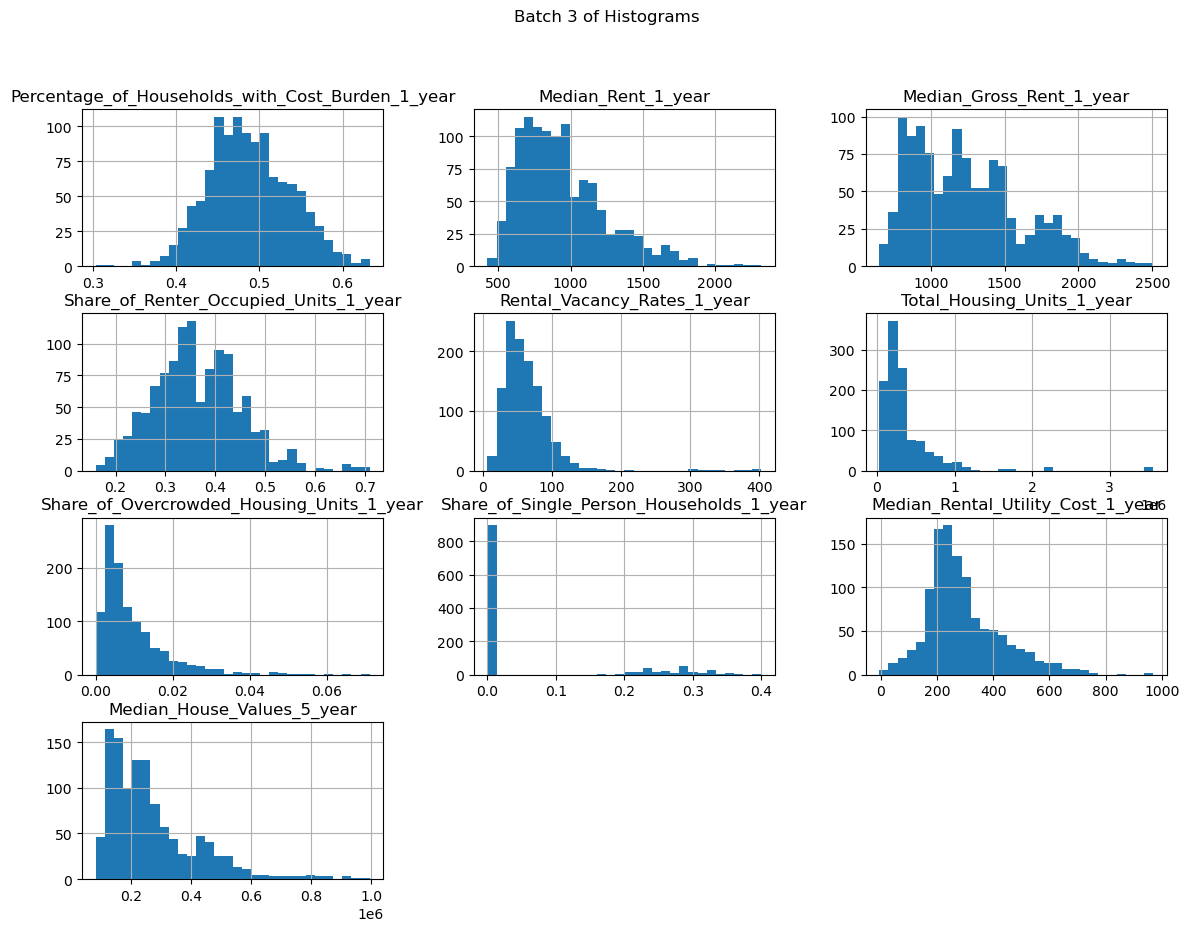

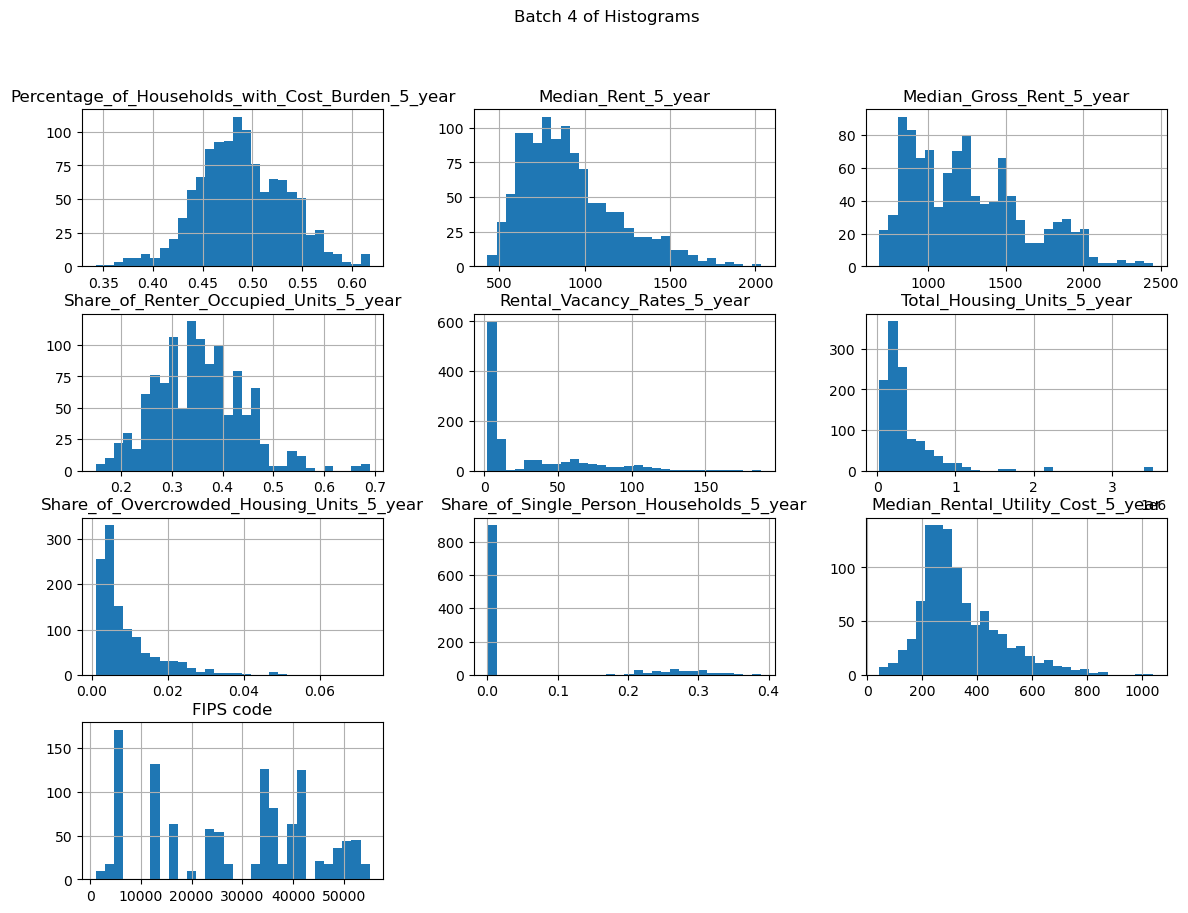

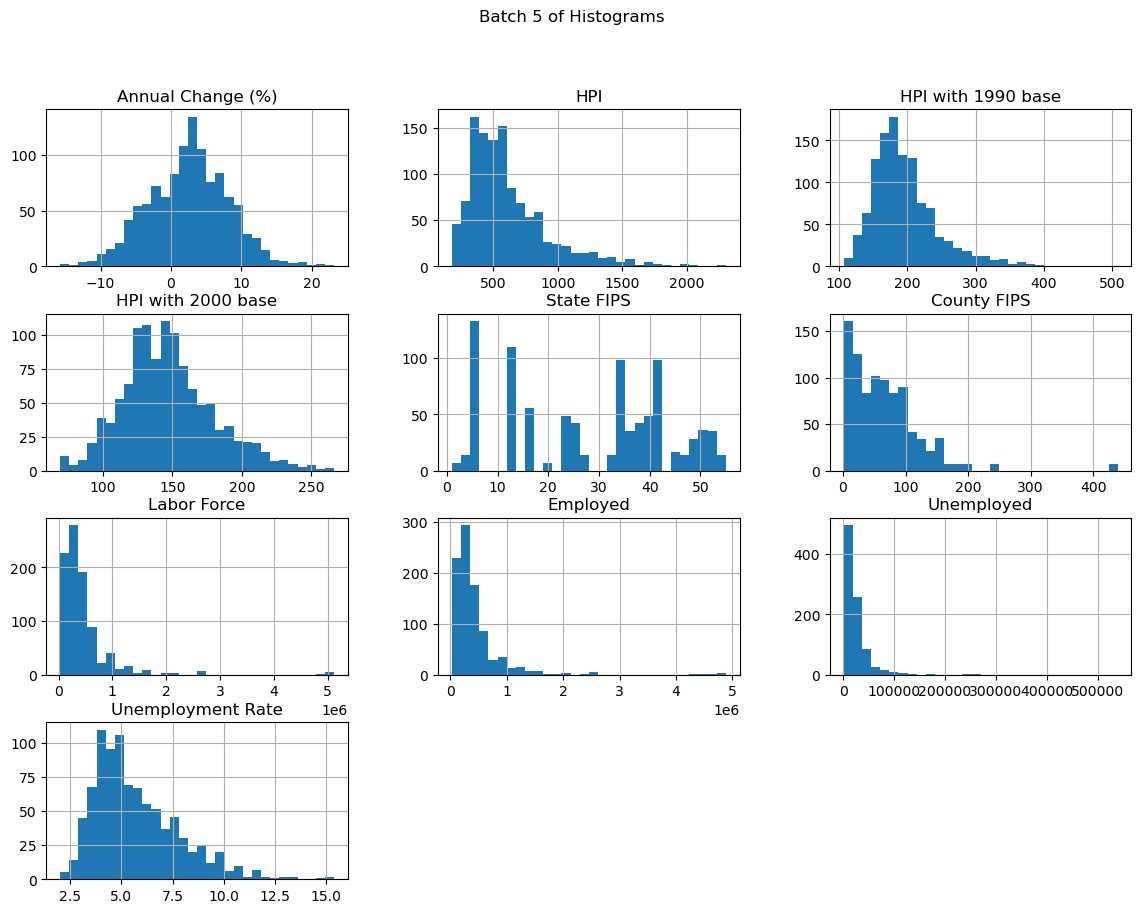

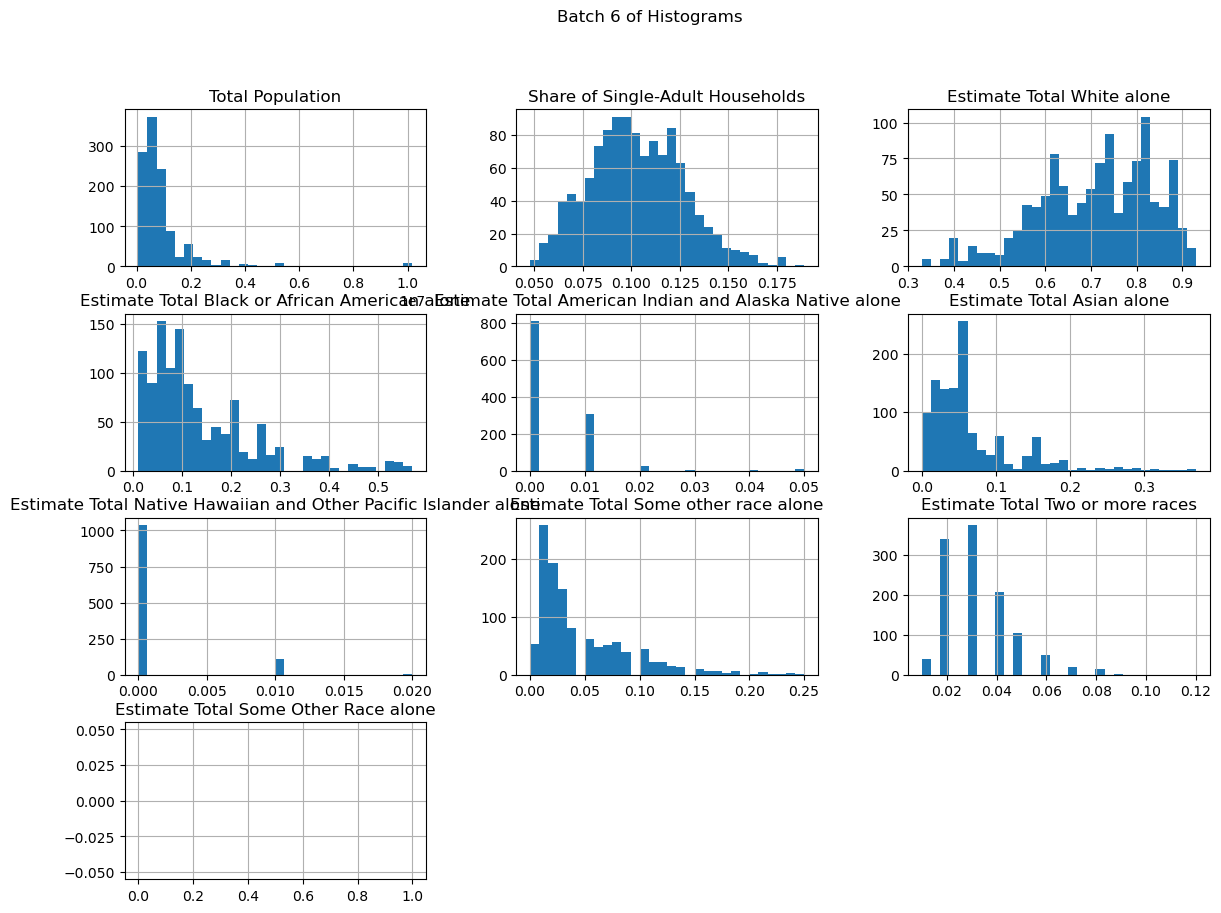

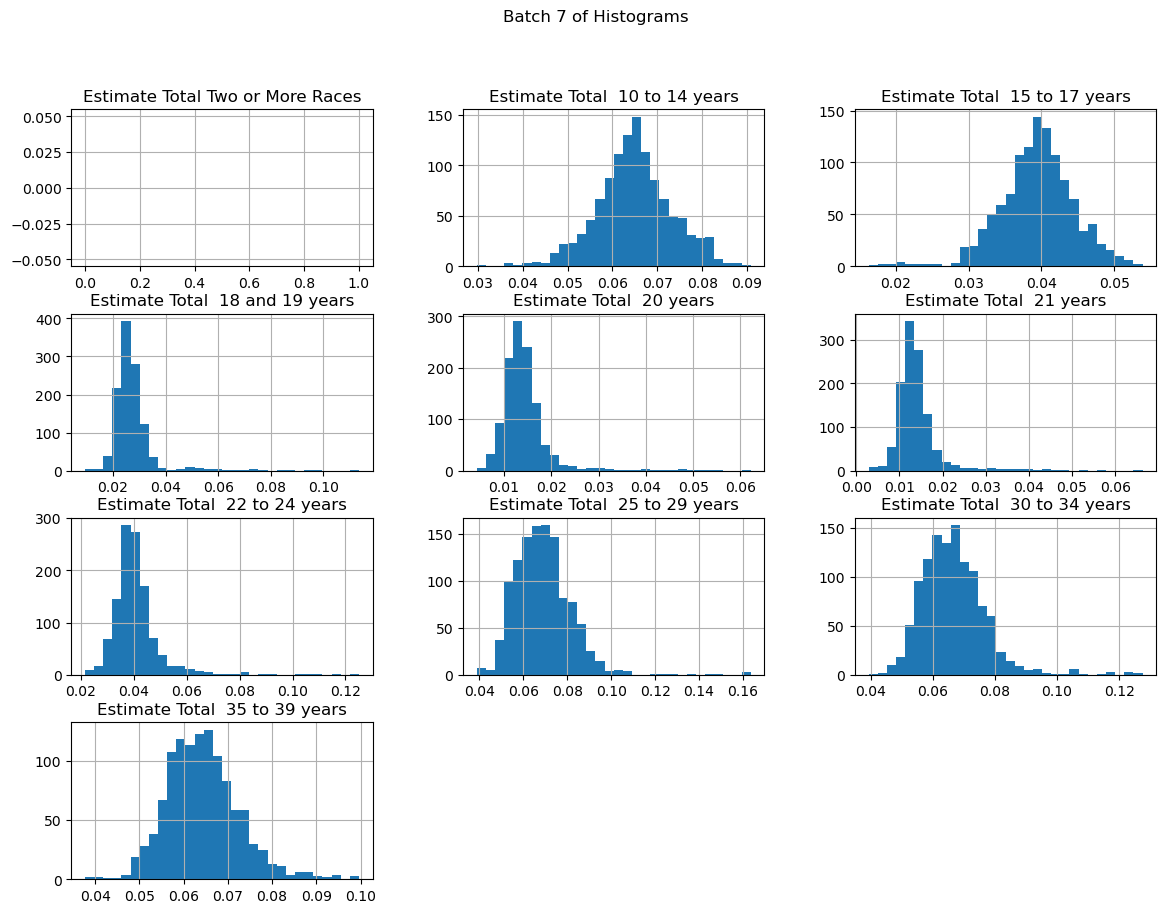

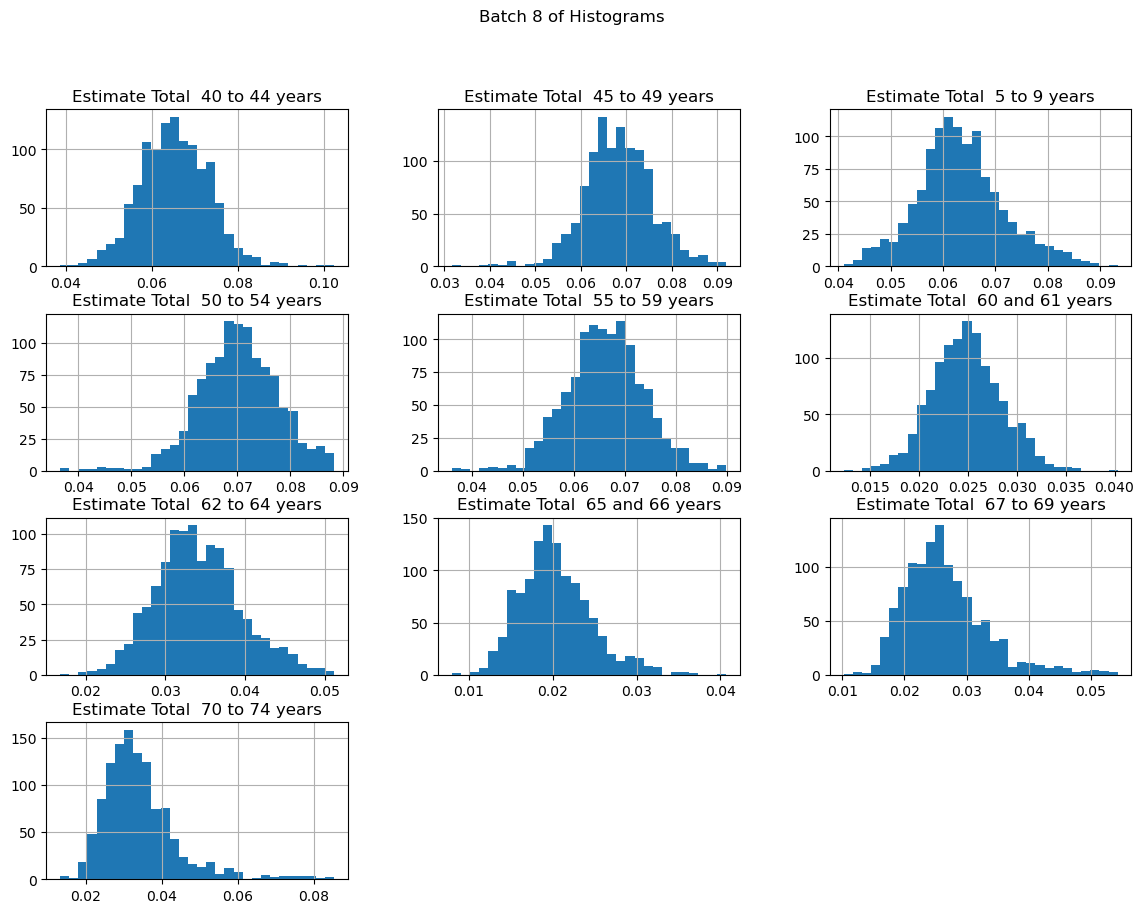

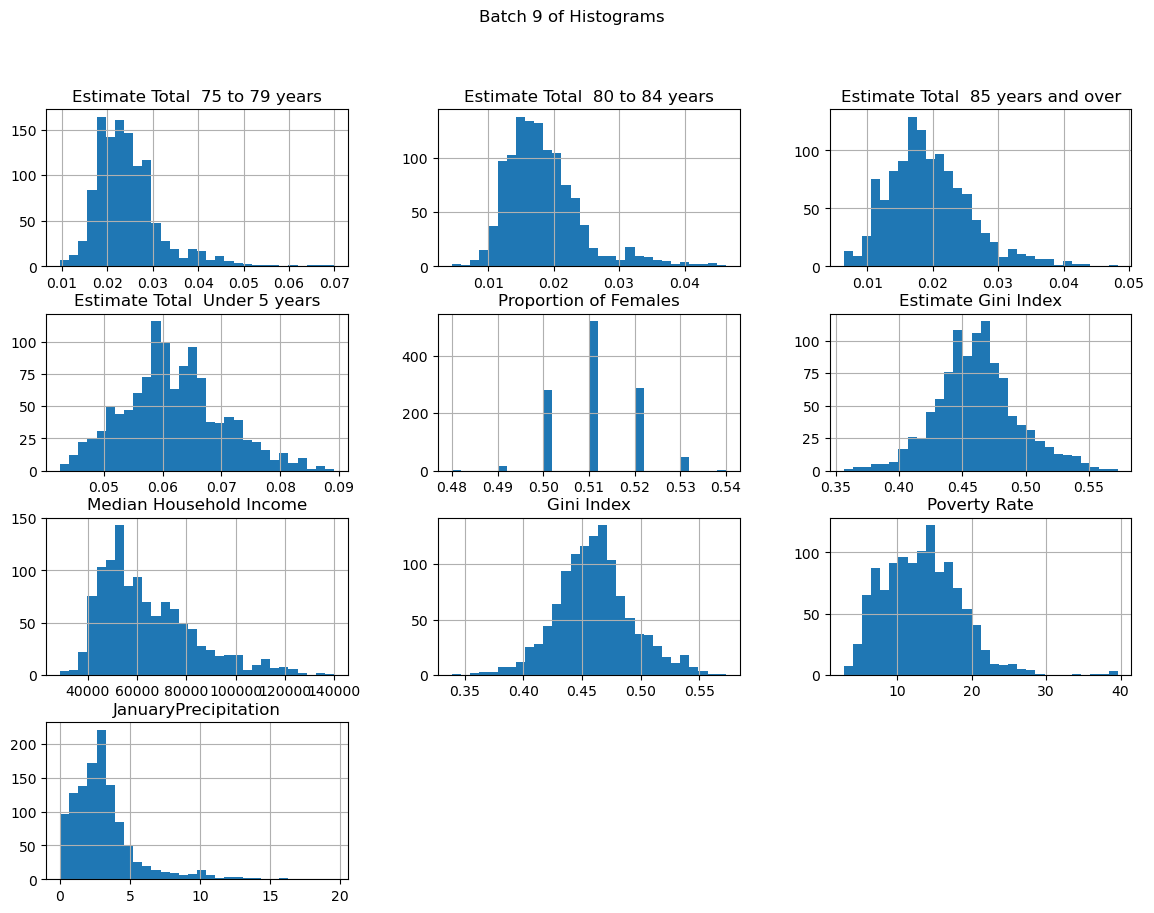

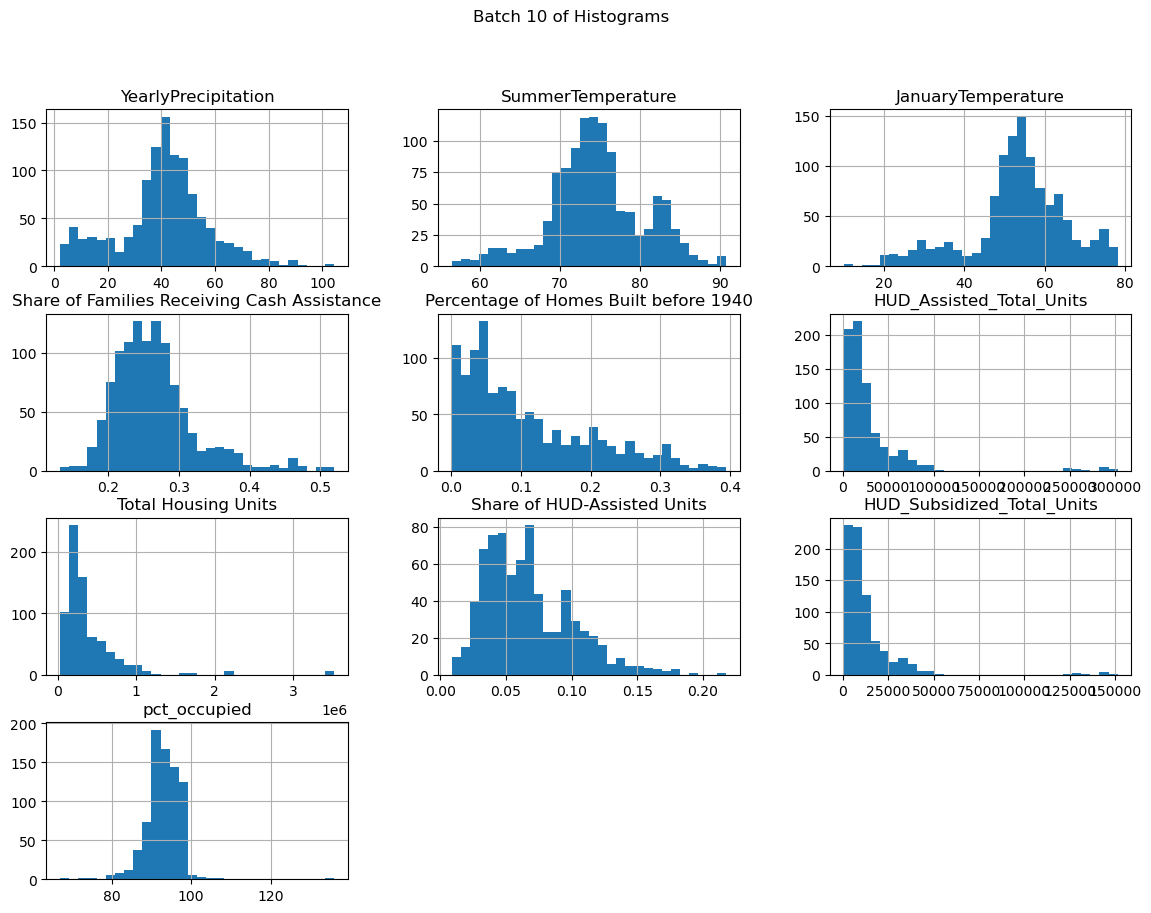

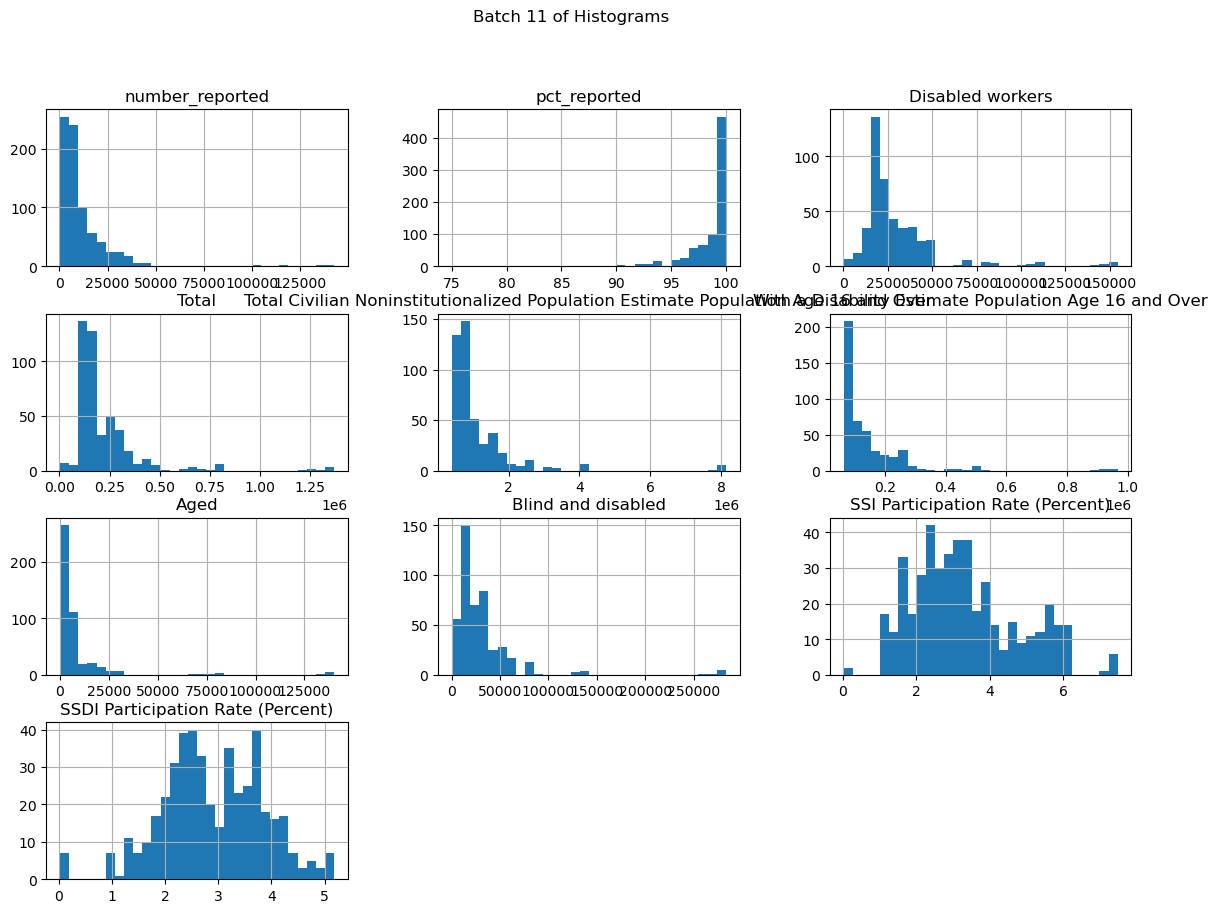

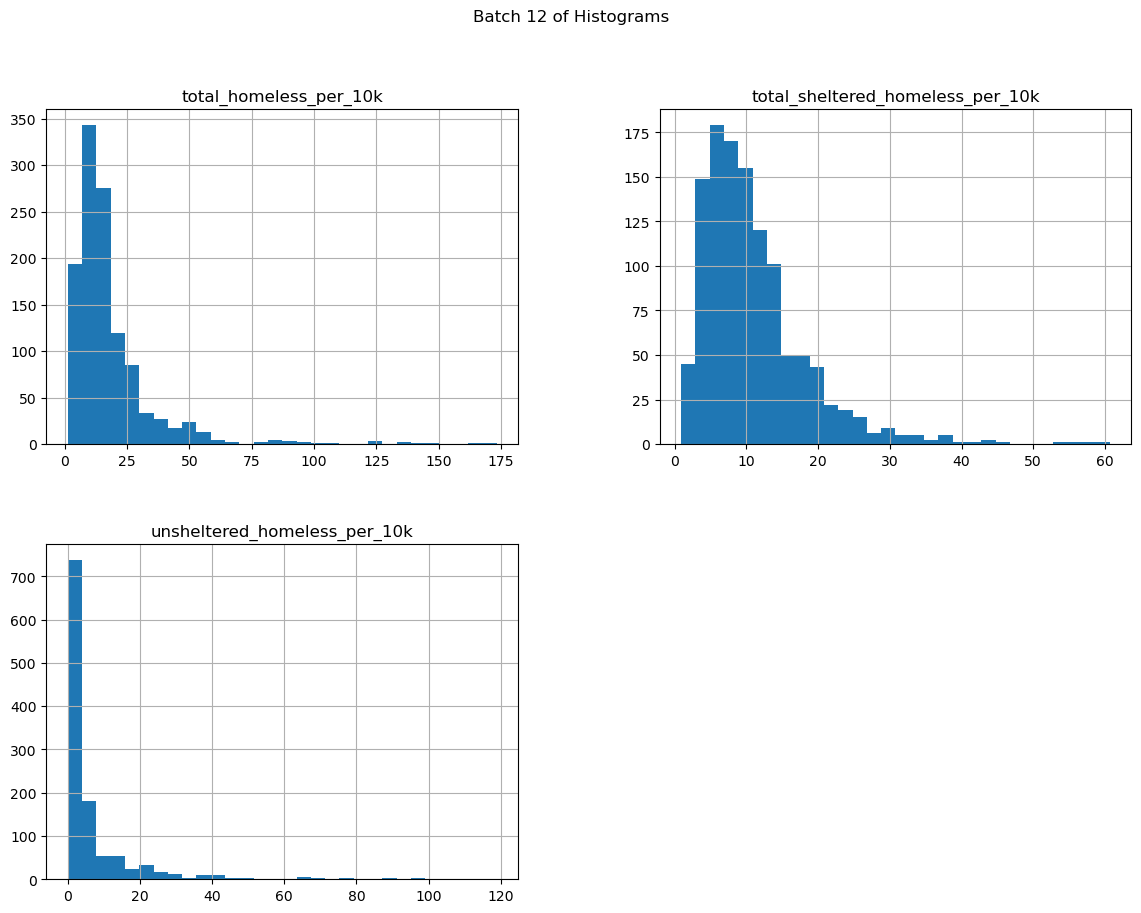

In [11]:
# Histogram of numerical columns
num_cols = df_homeless_csv.select_dtypes(include=['number']).columns

batch_size = 10  # Number of histograms per batch
num_batches = int(np.ceil(len(num_cols) / batch_size))  # Calculating the number of batches

for i in range(num_batches):
    batch_cols = num_cols[i * batch_size:(i + 1) * batch_size]
    df_homeless_csv[batch_cols].hist(figsize=(14, 10), bins=30)
    plt.suptitle(f'Batch {i + 1} of Histograms')
    plt.show()

<a id="looking-for-correlations"></a>
### Looking for correlations

Correlation Matrix Analysis

The full correlation matrix was too cluttered, so I filtered it to display only correlations above 0.5 (strong correlations). Here are some key observations:

1. Several predictor variables exhibit strong positive correlations, indicating potential multicollinearity among related features.
2. Some predictors show strong negative correlations, suggesting inverse relationships between certain variables.
3. Highly correlated predictors might indicate redundancy, which could impact model performance. Feature selection or dimensionality reduction techniques (e.g. PCA) might be useful.
4. Groups of strongly correlated variables may represent similar underlying factors, such as economic conditions, population density, or regional policies affecting homelessness rates.

d:\anaconda3\envs\class210\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


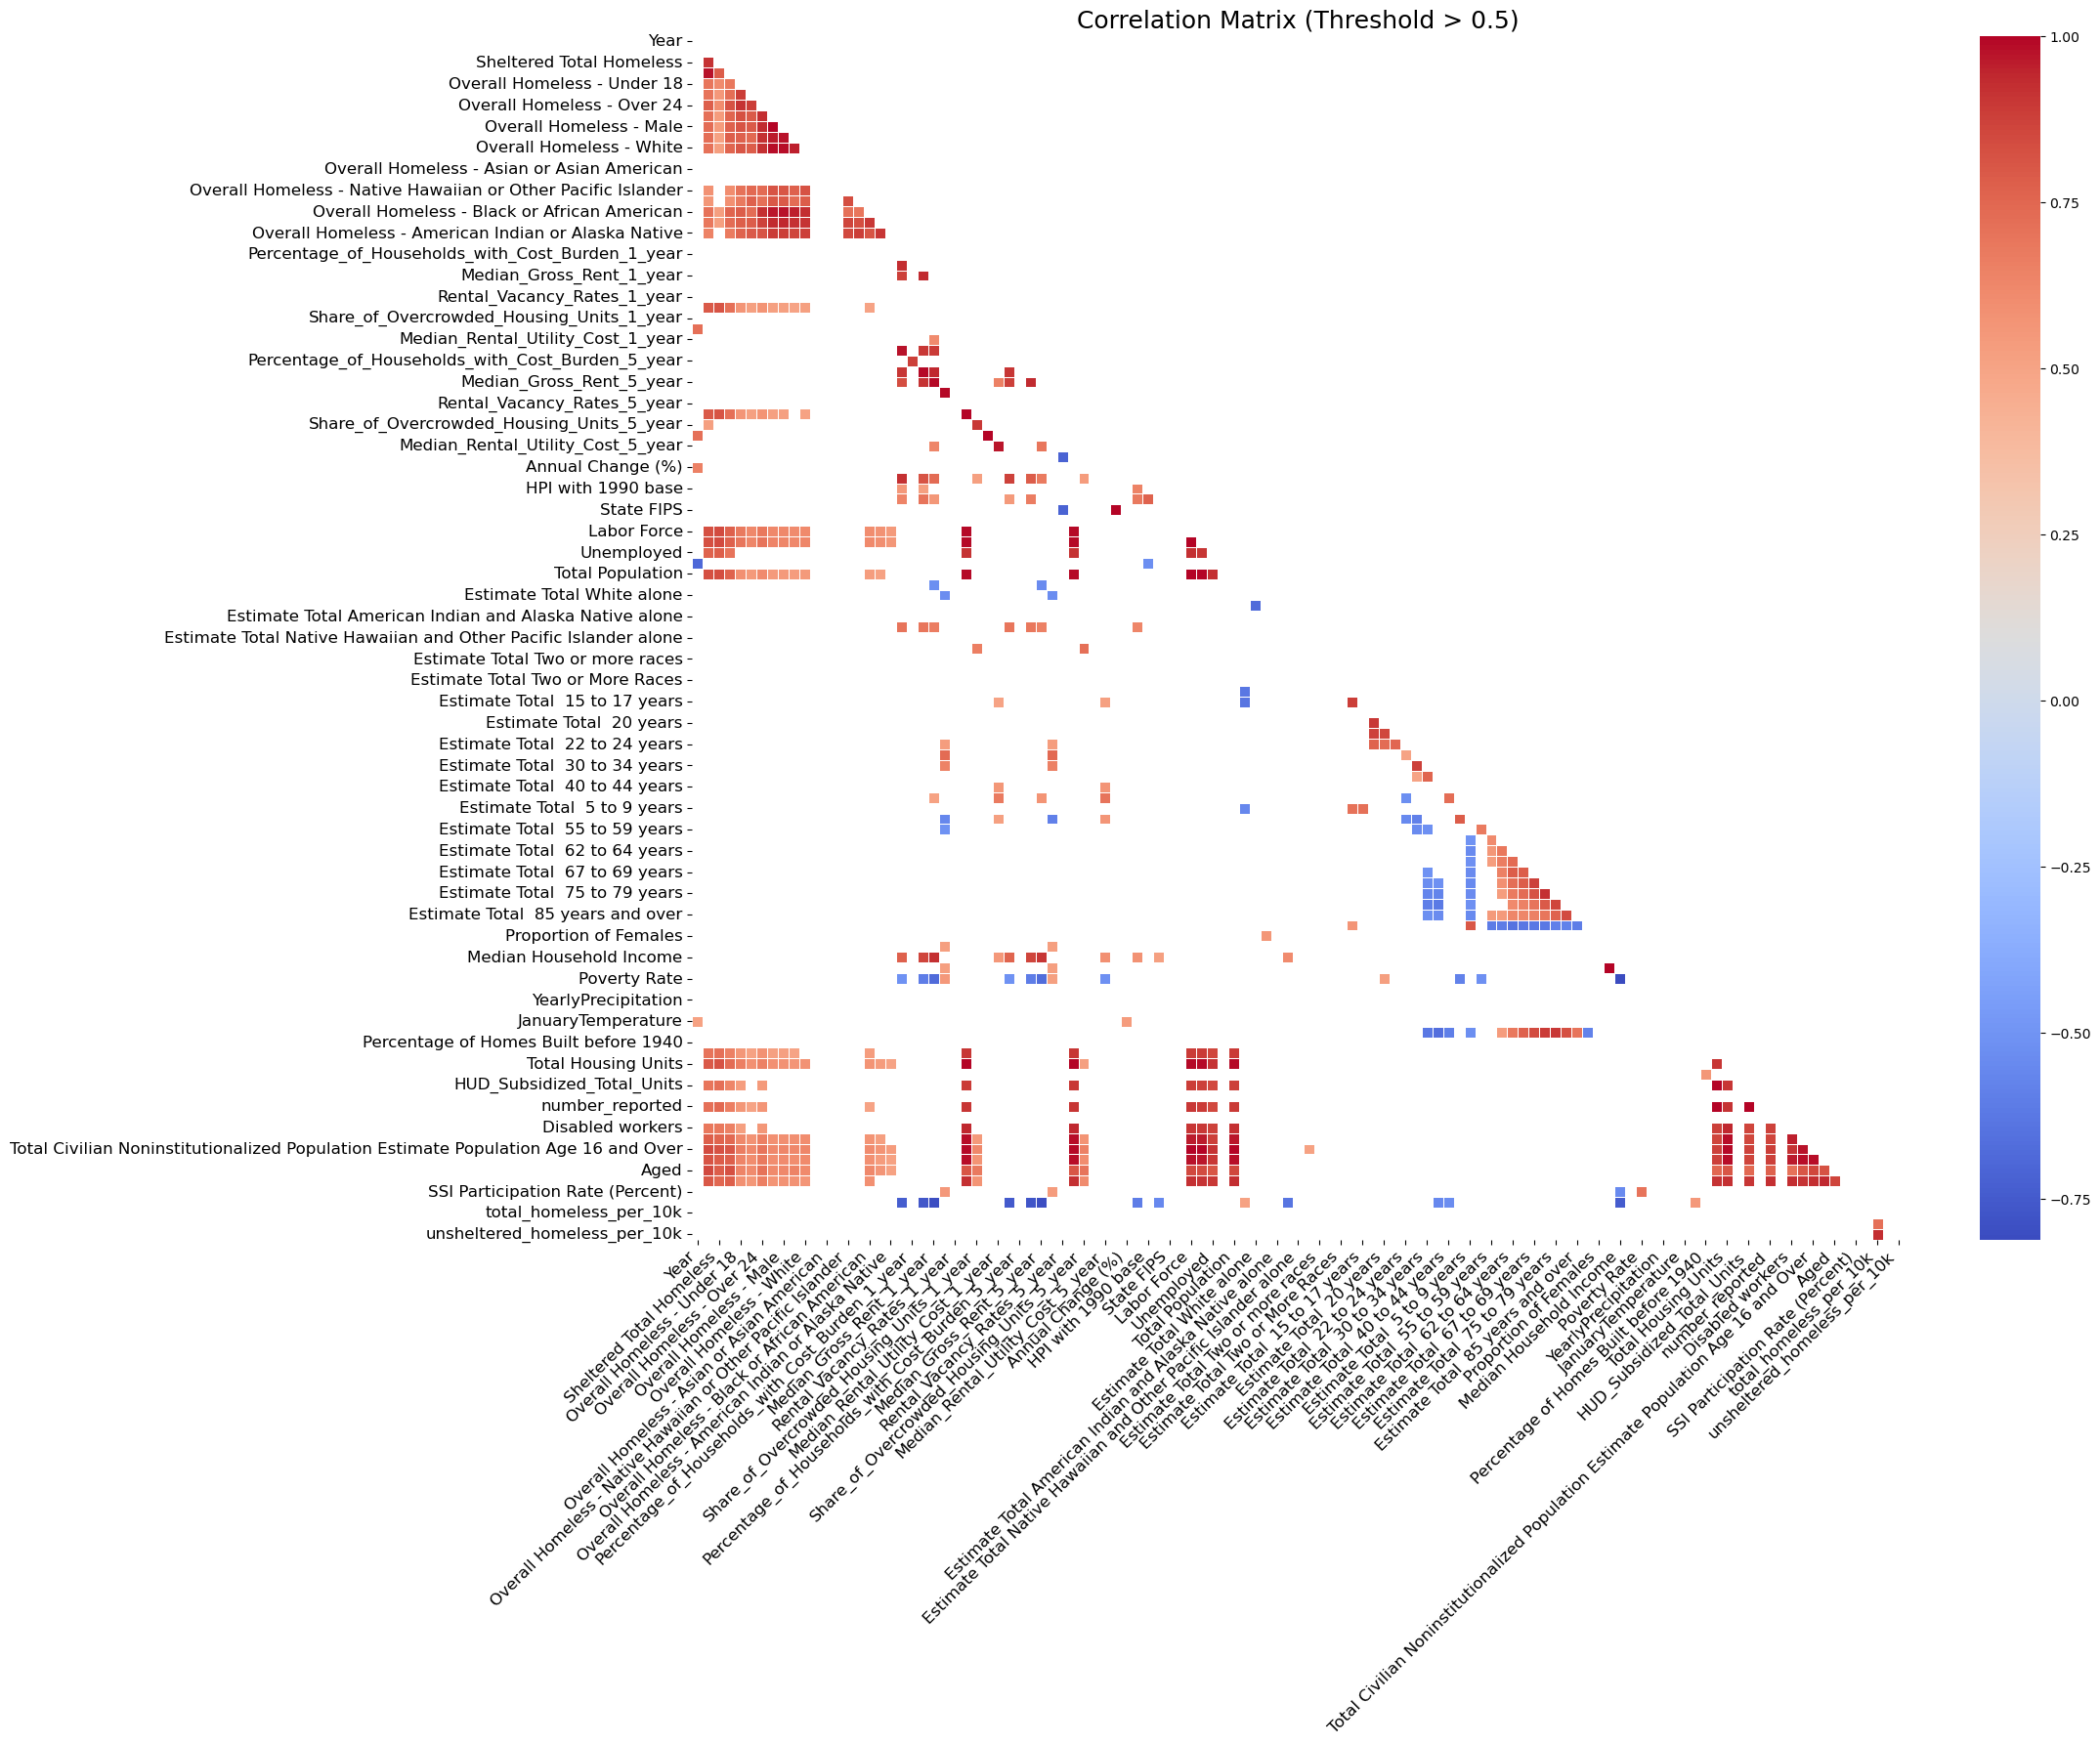

In [12]:
# Heatmap of numerical correlations
# setting the figure size
plt.figure(figsize=(20, 16))

corr_matrix = df_homeless_csv.select_dtypes(include=['number']).corr()

# Set correlation threshold
threshold = 0.5

# Fill NaNs with 0 to avoid warnings
corr_matrix = corr_matrix.fillna(0)

# Create a mask to hide weak correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#mask = abs(corr_matrix) < threshold
weak_corr_mask = abs(corr_matrix) < threshold

# Combining masks to hide both weak correlations and NaNs
combined_mask = mask | weak_corr_mask

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".1f", 
    linewidths=0.5, 
    mask=combined_mask,
    annot_kws={"size": 12}
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title(f"Correlation Matrix (Threshold > {threshold})", fontsize=18)

plt.show()

Pairplot Analysis

I selected the following columns for the pairplots to explore potential relationships:

1. Unsheltered Homeless
2. Sheltered Total Homeless
3. Aged
4. Total Civilian Noninstitutionalized Population (Age 16+) – represents the general population
5. Labor Force

Observations:

- Most plots show a dense grouping of values near the lower end, indicating that the majority of data points fall within a smaller range.
- A few outliers or extreme values appear near the upper end, suggesting that a small number of CoCs have significantly higher counts for these variables.
- There may be nonlinear relationships between certain variables, which could suggest further investigation using transformations or different statistical techniques.
- Some variables may show strong collinearity, particularly between population-related metrics and homelessness counts.

d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

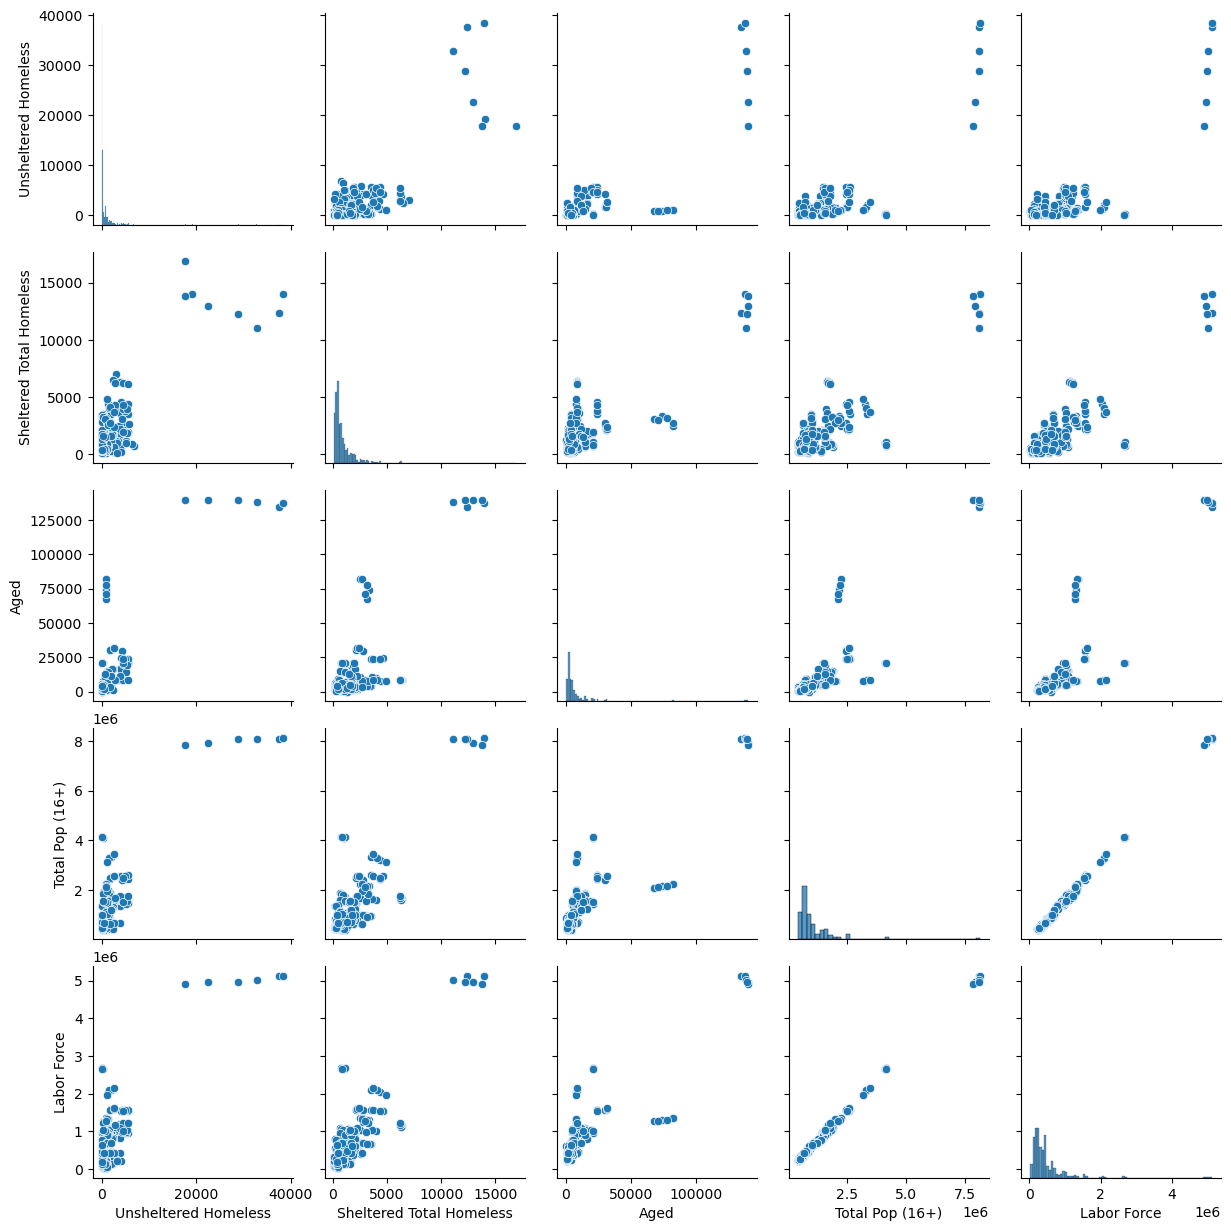

In [17]:
# Dataset is too large for my machine. Sampling the dataset to Max 500 rows
sample_size = min(1000, len(df_homeless_csv))
df_sampled = df_homeless_csv.sample(sample_size, random_state=42)

# Replacing infinite values with NaN to remove a warning
df_sampled = df_sampled.replace([np.inf, -np.inf], np.nan)

# Renaming the Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over column
df_shortened = df_sampled.rename(columns={
    "Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over": "Total Pop (16+)"
})

# Using the following columns for the pairplots
sns.pairplot(df_shortened[["Unsheltered Homeless", 
                         "Sheltered Total Homeless", 
                         "Aged", 
                         "Total Pop (16+)", 
                         "Labor Force"]],
             kind="scatter")

plt.show()

In [18]:
# Checking how many NaN values exist per column
missing_counts = df_sampled[["Unsheltered Homeless", 
                             "Sheltered Total Homeless", 
                             "Aged", 
                             "Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over", 
                             "Labor Force"]].isnull().sum()

print("Missing values per column:\n", missing_counts)

# Checking how many rows contain any NaN values
print("\nTotal rows before dropping NaNs:", len(df_sampled))
print("Rows with NaNs:", df_sampled.isnull().any(axis=1).sum())

Missing values per column:
 Unsheltered Homeless                                                                    0
Sheltered Total Homeless                                                                0
Aged                                                                                  609
Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over    609
Labor Force                                                                           203
dtype: int64

Total rows before dropping NaNs: 1000
Rows with NaNs: 1000
